In [ ]:
!gdown --id 1UN0RjFDRUuNKH8P59svpYbsfdCHLDmuy

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1UN0RjFDRUuNKH8P59svpYbsfdCHLDmuy
From (redirected): https://drive.google.com/uc?id=1UN0RjFDRUuNKH8P59svpYbsfdCHLDmuy&confirm=t&uuid=57f9ad30-10e9-414c-986a-77387cd3cc12
To: /content/MangoLeafData.zip
100% 108M/108M [00:03<00:00, 34.4MB/s]


In [ ]:
!unzip '/content/MangoLeafData.zip'

Archive:  /content/MangoLeafData.zip
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124249 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124306 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124253 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124252 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124250 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124302 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124301 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124256 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124310 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124312 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124305 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124334 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/202110

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical


In [ ]:
# Path to the directory where images are stored
dataset_dir = "/content/MangoLeafBD Dataset"
categories = os.listdir(dataset_dir)
print("Categories:", categories)


Categories: ['Sooty Mould', 'Powdery Mildew', 'Bacterial Canker', 'Cutting Weevil', 'Die Back', 'Healthy', 'Anthracnose', 'Gall Midge']


In [ ]:
img_size = (128, 128)  # Standardize image size
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)


Found 3200 images belonging to 8 classes.
Found 800 images belonging to 8 classes.


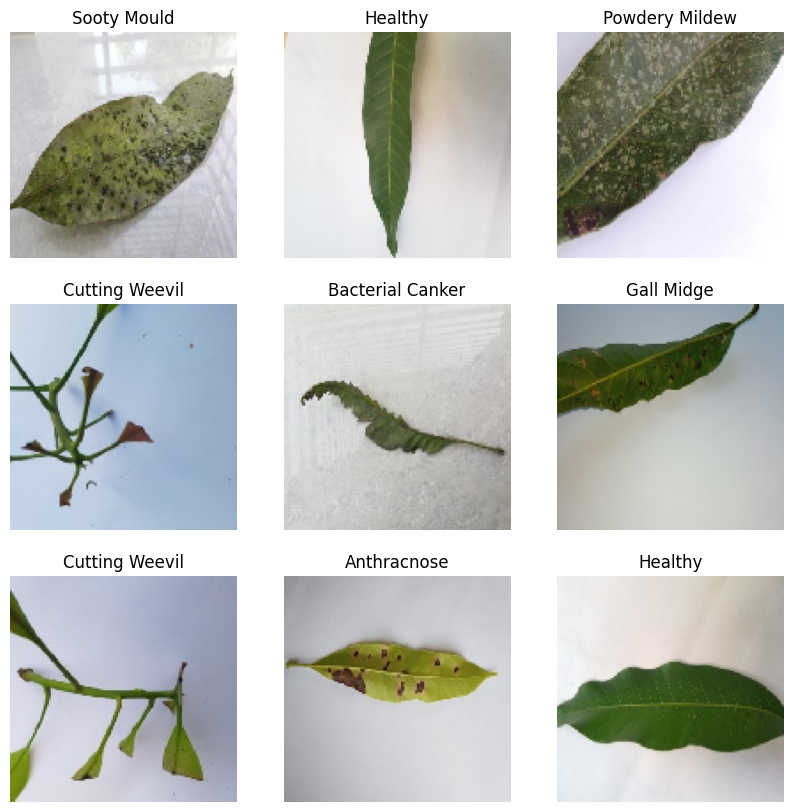

In [ ]:
import matplotlib.pyplot as plt

def plot_images(generator):
    class_names = list(generator.class_indices.keys())
    plt.figure(figsize=(10, 10))
    for images, labels in generator:
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i])
            plt.title(class_names[int(labels[i])])
            plt.axis("off")
        break

plot_images(train_generator)


In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
x = base_model.output
x = Flatten()(x)
feature_extractor_model = Model(inputs=base_model.input, outputs=x)

# Extract features and labels from training and validation data
def extract_features(generator):
    features = []
    labels = []
    for imgs, lbls in generator:
        feats = feature_extractor_model.predict(imgs)
        features.extend(feats)
        labels.extend(lbls)
        if len(features) >= generator.samples:
            break
    return np.array(features), np.array(labels)

X_train, y_train = extract_features(train_generator)
X_val, y_val = extract_features(val_generator)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━

In [ ]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_val)

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pandas as pd

# Function to display model evaluation results in a formatted way
def evaluate_model(model_name, y_true, y_pred):
    num_classes = len(set(y_true))  # Get the number of unique classes
    target_names = [f"Class {i}" for i in range(num_classes)]  # Create target names dynamically

    print(f"\n{'='*10} {model_name} Evaluation {'='*10}")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=target_names))
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    print(pd.DataFrame(cm, index=[f"Actual Class {i}" for i in range(num_classes)],
                                columns=[f"Predicted Class {i}" for i in range(num_classes)]))
    print(f"{'='*40}\n")

# Evaluate Decision Tree Model
evaluate_model("Decision Tree", y_val, y_pred_dt)

# Evaluate Random Forest Model
evaluate_model("Random Forest", y_val, y_pred_rf)

# Comparison Summary
print(f"{'='*10} Model Comparison Summary {'='*10}")
print(f"Decision Tree Accuracy: {accuracy_score(y_val, y_pred_dt):.4f}")
print(f"Random Forest Accuracy: {accuracy_score(y_val, y_pred_rf):.4f}")
print(f"{'='*40}")





========== Decision Tree Evaluation ==========
Accuracy: 0.4113

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.16      0.20      0.18       100
     Class 1       0.31      0.37      0.34       100
     Class 2       0.99      0.69      0.81       100
     Class 3       0.49      0.49      0.49       100
     Class 4       0.30      0.32      0.31       100
     Class 5       0.64      0.53      0.58       100
     Class 6       0.46      0.47      0.47       100
     Class 7       0.22      0.22      0.22       100

    accuracy                           0.41       800
   macro avg       0.45      0.41      0.42       800
weighted avg       0.45      0.41      0.42       800


Confusion Matrix:
                Predicted Class 0  Predicted Class 1  Predicted Class 2  \
Actual Class 0                 20                 23                  1   
Actual Class 1                 20                 37                  0   
Actual Class 2  

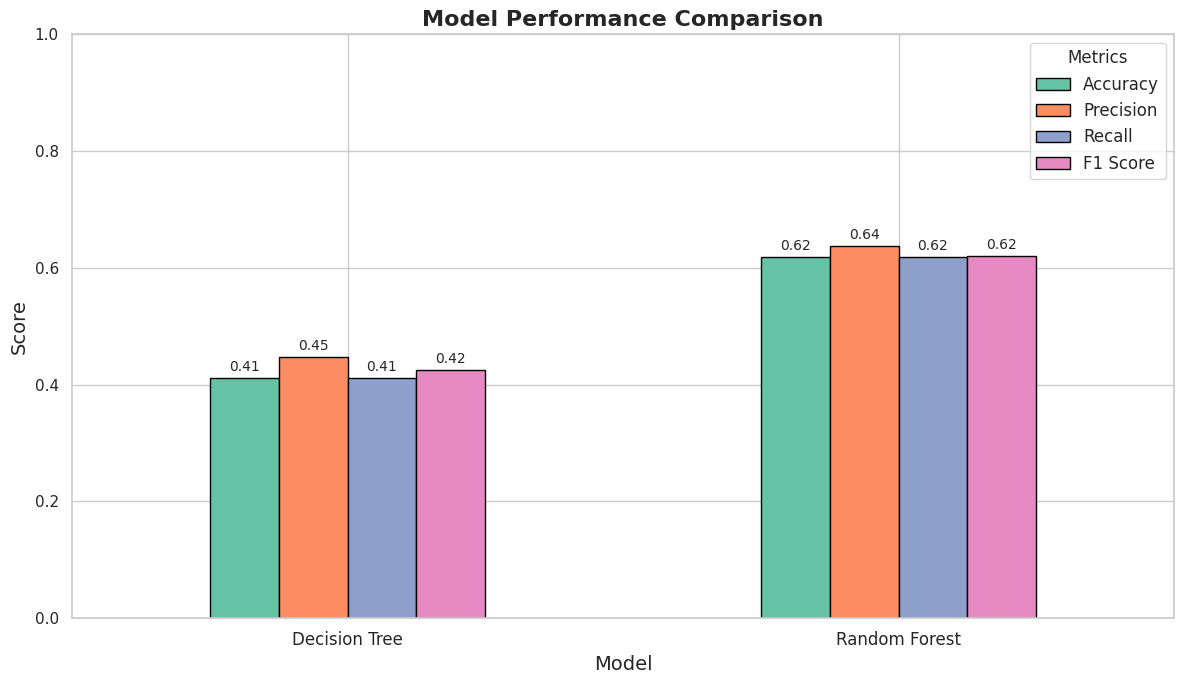

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd

# Calculate accuracy, precision, recall, and F1-score for both models
metrics = {
    "Model": ["Decision Tree", "Random Forest"],
    "Accuracy": [accuracy_score(y_val, y_pred_dt), accuracy_score(y_val, y_pred_rf)],
    "Precision": [precision_score(y_val, y_pred_dt, average='macro'), precision_score(y_val, y_pred_rf, average='macro')],
    "Recall": [recall_score(y_val, y_pred_dt, average='macro'), recall_score(y_val, y_pred_rf, average='macro')],
    "F1 Score": [f1_score(y_val, y_pred_dt, average='macro'), f1_score(y_val, y_pred_rf, average='macro')]
}

# Convert metrics into a DataFrame
metrics_df = pd.DataFrame(metrics)

# Set the style for the plot
sns.set_theme(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(12, 7))

# Create a bar plot with improved color palette and aesthetics
bar_colors = sns.color_palette("Set2", len(metrics_df.columns) - 1)
ax = metrics_df.set_index("Model").plot(kind="bar", ax=plt.gca(), color=bar_colors, edgecolor='black')

# Customize the plot
plt.title("Model Performance Comparison", fontsize=16, weight='bold')
plt.ylabel("Score", fontsize=14)
plt.xlabel("Model", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title="Metrics", loc="upper right", fontsize=12)
plt.ylim(0, 1)  # Set y-axis limit for better visualization

# Adding data labels on each bar with improved formatting
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type="edge", fontsize=10, padding=3)

# Add a grid for better readability
ax.yaxis.grid(True)

# Show the plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()


